In [1]:
from tensorflow import keras
import tensorflow_wavelets.Layers.DWT as DWT
import tensorflow_wavelets.Layers.DTCWT as DTCWT
import tensorflow_wavelets.Layers.DMWT as DMWT

# Custom Activation function Layer
import tensorflow_wavelets.Layers.Threshold as Threshold

In [48]:
from tensorflow import keras

input = keras.Input(shape=(512, 512, 1))
output = DWT.DWT(name="db4",concat=0)(input)
print(output)
output = DWT.IDWT(concat=0)(output)

model = keras.Model(inputs=input, outputs=output)
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 4), dtype=tf.float32, name=None), name='db4/concat:0', description="created by layer 'db4'")
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 512, 512, 1)]     0         
                                                                 
 db4 (DWT)                   (None, 256, 256, 4)       0         
                                                                 
 idwt_3 (IDWT)               (None, 512, 512, 1)       0         
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
import sys

from skimage.metrics import structural_similarity as ssim

from skimage.util import view_as_blocks

import numpy as np

from skimage.metrics import peak_signal_noise_ratio

import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras import backend as K

from sklearn.model_selection import train_test_split

from data_importer import load_testing_images
from data_importer import load_training_images, denormalize, trunc

import matplotlib.pyplot as plt


# Common testing image pairs (used to evaluate all models)

noisy_images, ground_truth_images = load_training_images('../../../../Dataset/LowDoseCTGrandChallenge/Training_Image_Data', load_limited_images=True, num_images_to_load=10)

_n, _g = load_training_images('../../../../Dataset/LowDoseCTGrandChallenge/Selected_Image_Pairs/', load_limited_images=False)
noisy_images = np.concatenate((noisy_images, _n), axis=0)
ground_truth_images = np.concatenate((ground_truth_images, _g), axis=0)

noisy_images = np.squeeze(noisy_images, axis=-1)
ground_truth_images = np.squeeze(ground_truth_images, axis=-1)

loaded training images x and y of len :  10 10  respectively
type of train images x :  float64
range of values in train images :  0.0 0.576171875
type of train images y :  float64
loaded training images x and y of len :  5 5  respectively
type of train images x :  float64
range of values in train images :  0.0 0.915283203125
type of train images y :  float64


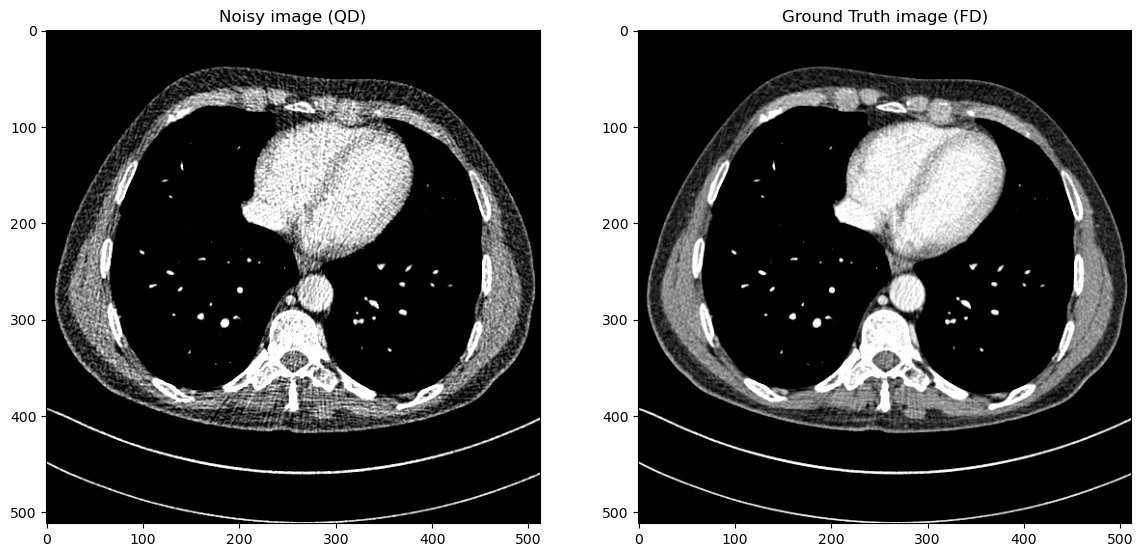

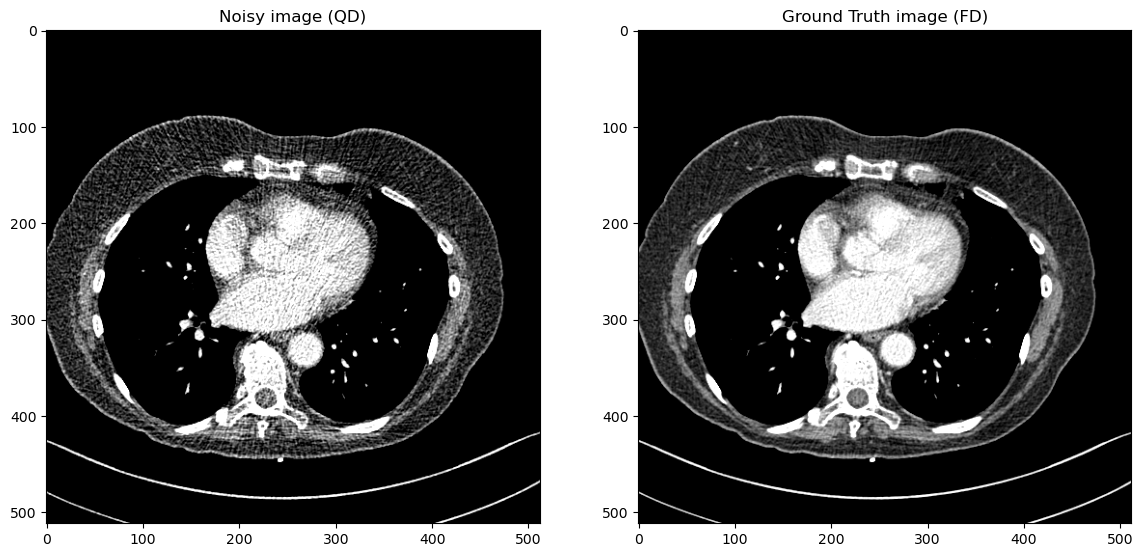

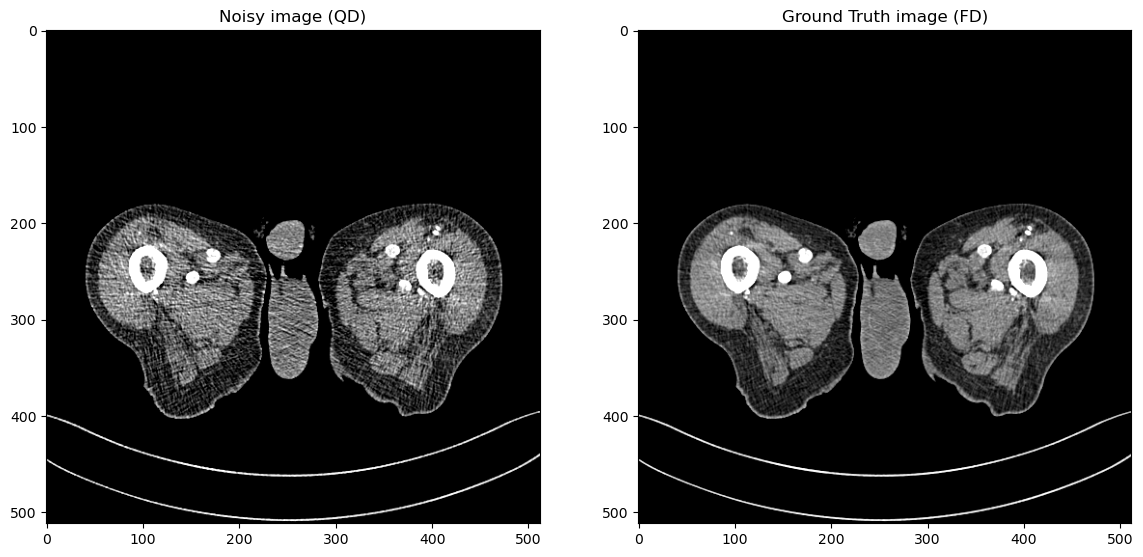

In [39]:
from data_importer import denormalize, trunc

for i in range(6, 15, 4):
    f, axarr = plt.subplots(1,2, figsize=(14,14))
    axarr[0].imshow(trunc(denormalize(noisy_images[i])), vmin=-160.0, vmax=240.0, cmap='gray')
    axarr[0].set_title("Noisy image (QD)")
    axarr[1].imshow(trunc(denormalize(ground_truth_images[i])), vmin=-160.0, vmax=240.0, cmap='gray')
    axarr[1].title.set_text("Ground Truth image (FD)")
    plt.show()

In [49]:
model.compile(metrics=['accuracy'], loss='mse')
model.fit(ground_truth_images, noisy_images)

1/1 [==============================] - 1s 840ms/step - loss: 1.0073e-04 - accuracy: 0.0065


In [50]:
pred = model.predict(ground_truth_images)

1/1 [==============================] - 1s 517ms/step


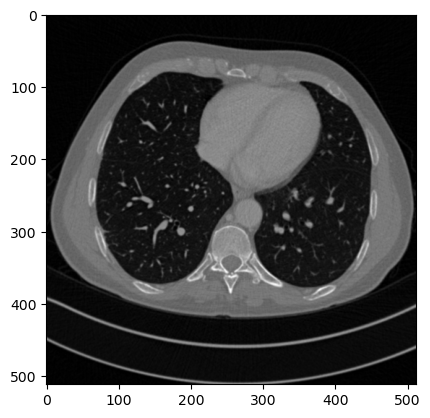

In [51]:

plt.imshow(pred[0], cmap='gray')

In [87]:
from tensorflow import keras

input = keras.Input(shape=(512, 512, 1))
output = DWT.DWT(name="db4",concat=0)(input)
print(output)
output = DWT.IDWT(concat=0)(output)

model = keras.Model(inputs=input, outputs=output)
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 4), dtype=tf.float32, name=None), name='db4/concat:0', description="created by layer 'db4'")
Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 512, 512, 1)]     0         
                                                                 
 db4 (DWT)                   (None, 256, 256, 4)       0         
                                                                 
 idwt_16 (IDWT)              (None, 512, 512, 1)       0         
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
print(model(ground_truth_images).shape, ground_truth_images.shape)

(15, 512, 512, 1) (15, 512, 512)


In [89]:
model.compile(optimizer='SGD', loss='mse')
model.fit(ground_truth_images, noisy_images)

1/1 [==============================] - 1s 517ms/step - loss: 1.0073e-04


In [90]:
x = model(ground_truth_images)[0]
x[:,:,0]
x.numpy()

array([[[0.01025391],
        [0.00512695],
        [0.00561523],
        ...,
        [0.00463867],
        [0.0090332 ],
        [0.00927734]],

       [[0.0090332 ],
        [0.00634766],
        [0.00976562],
        ...,
        [0.00341797],
        [0.00512695],
        [0.00830078]],

       [[0.00439453],
        [0.00341797],
        [0.00634765],
        ...,
        [0.00488281],
        [0.00561523],
        [0.00927734]],

       ...,

       [[0.00805664],
        [0.00537109],
        [0.00390625],
        ...,
        [0.00830078],
        [0.00610352],
        [0.00219727]],

       [[0.00463867],
        [0.00512695],
        [0.00488281],
        ...,
        [0.00463867],
        [0.00415039],
        [0.00292969]],

       [[0.00366211],
        [0.00244141],
        [0.00610352],
        ...,
        [0.00390625],
        [0.00537109],
        [0.00561523]]], dtype=float32)

In [92]:
x = model.predict(noisy_images)

1/1 [==============================] - 1s 536ms/step


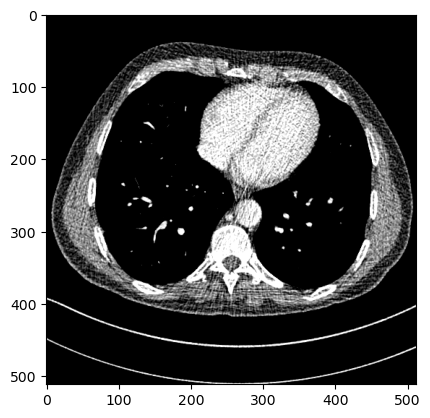

In [95]:
plt.imshow(trunc(denormalize(x[0])), vmin=-160.0, vmax=240.0, cmap='gray')
plt.show()

In [104]:
from tensorflow import keras

input = keras.Input(shape=(512, 512, 1))
output = DMWT.DMWT(name="db4")(input)
print(output)
output = DMWT.IDMWT()(output)

model = keras.Model(inputs=input, outputs=output)
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 1024, 1024, 1), dtype=tf.float32, name=None), name='db4/concat_12:0', description="created by layer 'db4'")
Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_56 (InputLayer)       [(None, 512, 512, 1)]     0         
                                                                 
 db4 (DMWT)                  (None, 1024, 1024, 1)     0         
                                                                 
 idmwt (IDMWT)               (None, 512, 512, 1)       0         
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
DTCWT.IDTCWT?

Init signature: DTCWT.IDTCWT(level=1, caoncatenated=True, **kwargs)
Docstring:     
Inverse Duel Tree Complex Wavelet Transform
Input: level - tree-level (int)
File:           c:\users\tarun\miniconda3\envs\denoising-conda-env\lib\site-packages\tensorflow_wavelets\layers\dtcwt.py
Type:           type
Subclasses:     

In [110]:
DTCWT.DTCWT?

Init signature: DTCWT.DTCWT(level=1, concat=True, **kwargs)
Docstring:     
Durel Tree Complex Wavelet Transform
Input: level - tree-level (int)
File:           c:\users\tarun\miniconda3\envs\denoising-conda-env\lib\site-packages\tensorflow_wavelets\layers\dtcwt.py
Type:           type
Subclasses:     